In [1]:
#import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where

In [2]:
# import data
data = pd.read_csv("C:\\Users\\Asus Rog Strix\\Desktop\\FAX\\Analiza podatkov kupcev\\SVM\\Podatki\\Dr_podatki_obdelani4.csv",  encoding = "ISO-8859-1")

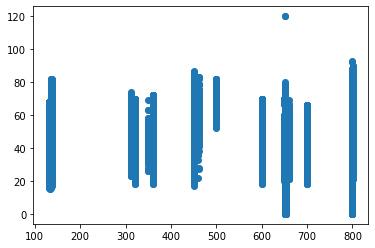

In [5]:
#input data
df = data[["PLANNO", "STAROST"]]
plt.scatter(data["PLANNO"],df["STAROST"])

In [123]:
# model specification
model = OneClassSVM (kernel='rbf',gamma = 0.0001, nu = 0.0001).fit(df)

In [124]:
#prediction
y_pred = model.predict(df)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [125]:
#filter outlier index
outlier_index = where(y_pred == -1)

#filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,PLANNO,STAROST
7670,500,82
10436,500,82
38986,601,18
51849,451,87
72153,450,17
72588,800,93
83813,311,74
101317,450,19
133720,652,120
137622,135,82


Text(0, 0.5, 'Starost')

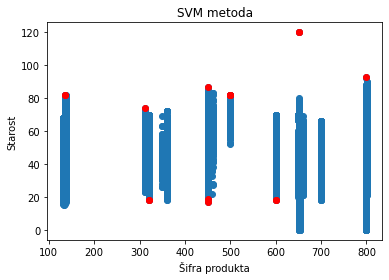

In [126]:
#visualize outputs
plt.scatter(data["PLANNO"],df["STAROST"])
plt.scatter(outlier_values["PLANNO"],outlier_values["STAROST"],c="r")
plt.title('SVM metoda')
plt.xlabel('Šifra produkta')
plt.ylabel('Starost')